# Q1
#### (15%) Simulate the averages of [2,3,4,5] dices for 1000 times. Draw four histograms for the averages of [2,3,4,5] dices.
##### *Recall the “Central Limit Theorem” in the first lecture.

## Answer
如下圖輸出的圖片，皆大致呈常態分佈。

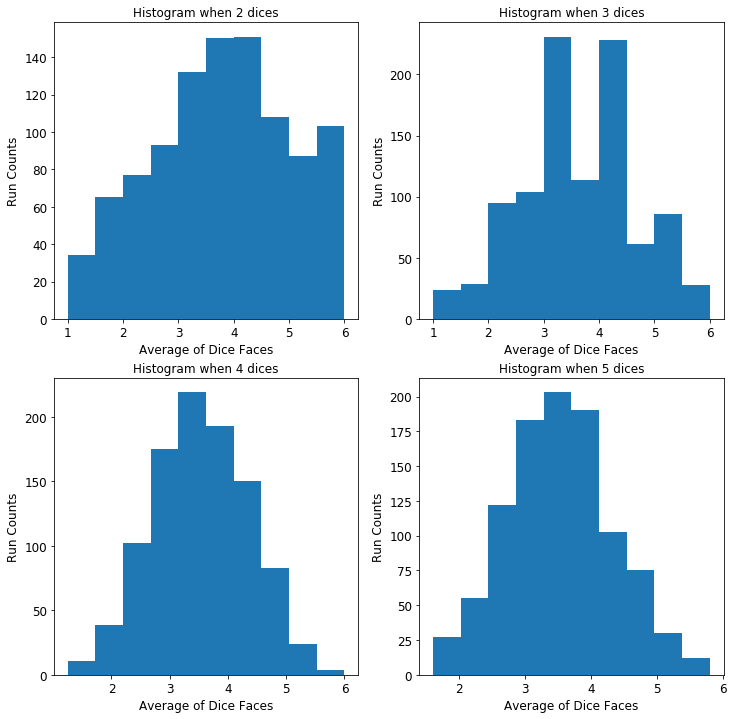

In [6]:
import random
import matplotlib.pyplot as plt

def throw_the_dice(dice_numbers):
    # set random seed
    random.seed(100)
    # simulate a dice 
    dice_list = [1, 2, 3, 4, 5, 6]
    result_list = []
    for run in range(1000):
        dice_sum = 0
        for index in range(j):
            dice_sum += dice_list[random.randint(0, 5)]
        dice_average = dice_sum / j
        result_list.append(dice_average)
    return result_list

# start the program
if __name__ == '__main__':
    # dice numbers we ganna throw
    dice_number_list = [2, 3, 4, 5]
    plt.figure(figsize=(12,12))
    bins=10
    fontsize=12
    for i, j in enumerate(dice_number_list):
        result = throw_the_dice(j)
        plt.subplot((len(dice_number_list)/2), 2, (i+1))
        plt.hist(result, bins=bins)
        plt.title("Histogram when " + str(j) + " dices", fontsize=fontsize)
        plt.xlabel("Average of Dice Faces", fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        plt.ylabel("Run Counts", fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
    plt.show()

# Q2
#### To validate the Kruskal’s count in the first lecture, we play the game with one deck of cards, i.e., 52 cards, for 10000 times. Each time, start from the first 10 cards and the face cards (J/Q/K) are counted as 5 steps.
#### a. (10%) What is the probability that all the first 10 cards will end on the same card.
#### b. (10%) Vary the simulation settings: [52,104] cards are randomly shuffled and # of steps for face cards =[1,3,5,7,9], what are the 2×5=10 probabilities? What is your observation?

## Answer
#### (a)
Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 5, 10000) is:  0.5775
#### (b)
Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 1, 10000) is:  0.8259

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 3, 10000) is:  0.7045

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 5, 10000) is:  0.5801

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 7, 10000) is:  0.4637

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 9, 10000) is:  0.3412

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (2, 1, 10000) is:  0.9912

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (2, 3, 10000) is:  0.9722

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (2, 5, 10000) is:  0.9374

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (2, 7, 10000) is:  0.8848

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (2, 9, 10000) is:  0.8144

根據下面實驗的結果，我們可以發現：
1. 牌的張數（副數）和最後落在同一張牌的機率是呈正向關係（牌越多，可能性越高）
2. JQK牌面所代表的步數，和最後落在同一張牌的機率是呈反向關係（代表的步數越多，可能性越低）

In [42]:
import random

def kruskal_experiment(card_decks, face_card_step, epochs):
    test_result = []
    for i in range(epochs):
        card_list = [i for i in range(1, 11)] + [face_card_step] * 3
        total_cards = card_list * 4 * card_decks
        random.shuffle(total_cards)
        result_list = []
        result = 0
        for index in range(10):
            chosen_index = index
            chosen_card = total_cards[chosen_index]
            while True:
                if chosen_index + chosen_card < len(total_cards):
                    chosen_index = chosen_index + chosen_card
                    chosen_card = total_cards[chosen_index]
                else:
                    last_index = chosen_index
                    result_list.append(last_index)
                    break
        if len(set(result_list)) == 1:
            result = 1
        test_result.append(result)
    prob = test_result.count(1) / len(test_result)
    return prob


if __name__ == '__main__':
    # (a) (card_decks, face_card_step, epochs) = (1, 5, 10000)
    card_decks, face_card_step, epochs = 1, 5, 10000
    prob = kruskal_experiment(card_decks, face_card_step, epochs)
    print("Probability that all the first 10 cards will end on the same card with "\
          "(card_decks, face_card_step, epochs) = (1, 5, 10000) is: ", prob)
    # (b) (card_decks, face_card_step, epochs) = ([1, 2] , [1, 3, 5, 7, 9], 10000)
    card_decks = [1, 2] 
    face_card_step = [1, 3, 5, 7, 9]
    epochs = 10000
    for i, j in enumerate(card_decks):
        for a, b in enumerate(face_card_step):
            prob = kruskal_experiment(j, b, epochs)
            print("Probability that all the first 10 cards will end on the same card with "\
          "(card_decks, face_card_step, epochs) = (" + str(j) + ", " + str(b) + ", 10000) is: ", prob) 

Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 5, 10000) is:  0.5775
Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 1, 10000) is:  0.8259
Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 3, 10000) is:  0.7045
Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 5, 10000) is:  0.5801
Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 7, 10000) is:  0.4637
Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (1, 9, 10000) is:  0.3412
Probability that all the first 10 cards will end on the same card with (card_decks, face_card_step, epochs) = (2, 1, 10000) is:  0.9912
Probability that all the first 10 cards will end

# Bonus: Kruskal Card Game 遊玩版
#### 可以玩Kruskal Card Game的小程式

In [41]:
import random

def kruskal_card_game(card_decks, face_card_step):
    card_list = [i for i in range(1,11)] + ["J", "Q", "K"]
    total_cards = card_list * 2 * card_decks
    random.shuffle(total_cards)
    real_total_cards = []
    for i, j in enumerate(total_cards):
        if j == "J" or j == "Q" or j == "K":
            j = face_card_step
        real_total_cards.append(int(j))
    hello_message = "========= Welcome to Ricardo's Kruskal Card Game!!! ========="
    print(hello_message)
    print("Face Cards's Step is: ", face_card_step)
    chosen_string = "cards: \n"
    for i, j in enumerate(total_cards[0:10]):
        chosen_string += str(i+1) + ". " +  str(j) + "\n"
    print(chosen_string)
    print()
    chosen_index = int(input('Please enter the index of the card you want to start with: ')) - 1
    chosen_card = real_total_cards[chosen_index]
    print("=============================================================")
    print("The card chosen by you is: ", total_cards[chosen_index])
    print("The total card deck: ", total_cards)
    while True:
        if chosen_index + chosen_card < len(total_cards):
            chosen_index = chosen_index + chosen_card
            chosen_card = real_total_cards[chosen_index]
            print("Your next card is: ", total_cards[chosen_index])
        else:
            ending_message = "========= Game Ended ========="
            while True:
                if len(ending_message) < len(hello_message):
                    ending_message += "="
                else:
                    break
            print(ending_message)
            print("Your ending card is:", total_cards[chosen_index], "\n\n\n")
            break

if __name__ == '__main__':
    card_decks = 2
    face_card_step = 3
    kruskal_card_game(card_decks, face_card_step)

========= Welcome to Ricardo's Kruskal Card Game!!! =========
Face Cards's Step is:  3
cards: 
1. 5
2. Q
3. 3
4. 6
5. 7
6. 4
7. K
8. J
9. 4
10. 5


Please enter the index of the card you want to start with: 1
The card chosen by you is:  5
The total card deck:  [5, 'Q', 3, 6, 7, 4, 'K', 'J', 4, 5, 9, 'K', 8, 9, 7, 9, 2, 10, 8, 'J', 7, 1, 3, 1, 'K', 1, 8, 7, 6, 2, 10, 10, 'Q', 'Q', 'J', 3, 'Q', 6, 8, 9, 6, 2, 'J', 2, 4, 4, 'K', 10, 3, 5, 1, 5]
Your next card is:  4
Your next card is:  5
Your next card is:  7
Your next card is:  1
Your next card is:  3
Your next card is:  1
Your next card is:  8
Your next card is:  J
Your next card is:  6
Your next card is:  2
Your next card is:  4
Your next card is:  5
========= Game Ended ========================================
Your ending card is: 5 



